In [136]:
# Import Libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

color_pal = sns.color_palette()

In [137]:
# Read the csv files from my local directory
file = "Sales Data.csv"
df = pd.read_csv(file)

In [138]:
# Few the first 10 rows
df.head(10)

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12
5,5,295670,AA Batteries (4-pack),1,3.84,2019-12-31 22:58:00,"200 Jefferson St, New York City, NY 10001",12,3.84,New York City,22
6,6,295671,USB-C Charging Cable,1,11.95,2019-12-16 15:10:00,"928 12th St, Portland, OR 97035",12,11.95,Portland,15
7,7,295672,USB-C Charging Cable,2,11.95,2019-12-13 09:29:00,"813 Hickory St, Dallas, TX 75001",12,23.90,Dallas,9
8,8,295673,Bose SoundSport Headphones,1,99.99,2019-12-15 23:26:00,"718 Wilson St, Dallas, TX 75001",12,99.99,Dallas,23
9,9,295674,AAA Batteries (4-pack),4,2.99,2019-12-28 11:51:00,"77 7th St, Dallas, TX 75001",12,11.96,Dallas,11


Data Cleaning and Wrangling

In [139]:
# The number of rows and columns in the dataset
df.shape

(185950, 11)

In [140]:
# Statistical analysis of numericial columns in the dataset
df.describe()

,Unnamed: 0,Order ID,Quantity Ordered,Price Each,Month,Sales,Hour
count,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,8340.388475,230417.569379,1.124383,184.399735,7.059140,185.490917,14.413305
std,5450.554093,51512.737110,0.442793,332.731330,3.502996,332.919771,5.423416
min,0.000000,141234.000000,1.000000,2.990000,1.000000,2.990000,0.000000
25%,3894.000000,185831.250000,1.000000,11.950000,4.000000,11.950000,11.000000
50%,7786.000000,230367.500000,1.000000,14.950000,7.000000,14.950000,15.000000
75%,11872.000000,275035.750000,1.000000,150.000000,10.000000,150.000000,19.000000
max,25116.000000,319670.000000,9.000000,1700.000000,12.000000,3400.000000,23.000000


In [141]:
# The data type of each column in the dataset
df.dtypes

Unnamed: 0            int64
Order ID              int64
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
Hour                  int64
dtype: object

In [142]:
# Get further info on each column and count non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [143]:
# Check if there is a null value in the entire dataset
df.isna().values.any()

False

In [144]:
# Check for the number of non value
df.isna().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

In [145]:
# List out all Columns in the dataset
df.columns

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [146]:
# Drop the column 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [147]:
# Split the Order Date into two columns
df[['Order Date', 'Order Time']] = df['Order Date'].str.split(' ', expand=True)
df[['Order Date', 'Order Time']].head()

,Order Date,Order Time
0,2019-12-30,00:01:00
1,2019-12-29,07:03:00
2,2019-12-12,18:21:00
3,2019-12-22,15:13:00
4,2019-12-18,12:38:00


In [148]:
# strip off :00 from the Order Time
df['Order Time'] = df['Order Time'].str.rstrip(":00")
df['Order Time'].head()

0    00:01
1    07:03
2    18:21
3    15:13
4    12:38
Name: Order Time, dtype: object

In [149]:
# replace 00:01 to 01:00
for row in df.index:
    if df.loc[row, 'Order Time'] == '00:01':
        df.loc[row, 'Order Time'] = '01:00'

df['Order Time'].head()

0    01:00
1    07:03
2    18:21
3    15:13
4    12:38
Name: Order Time, dtype: object

In [150]:
# Convert the order time column to datetime type
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Order Date'] = df['Order Date']
df['Order Date'].head()

0   2019-12-30
1   2019-12-29
2   2019-12-12
3   2019-12-22
4   2019-12-18
Name: Order Date, dtype: datetime64[ns]

In [151]:
# strip out unwanted space in the City column
df["City"] = df["City"].str.strip(" ")

In [152]:
# Create a new dataset with subset
df_new = df[['Order ID', 'Order Date', 'Order Time', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Purchase Address', 'City']]

In [153]:
# View first 10 rows
df_new.head(10)

,Order ID,Order Date,Order Time,Product,Quantity Ordered,Price Each,Sales,Purchase Address,City
0,295665,2019-12-30,01:00,Macbook Pro Laptop,1,1700.00,1700.00,"136 Church St, New York City, NY 10001",New York City
1,295666,2019-12-29,07:03,LG Washing Machine,1,600.00,600.00,"562 2nd St, New York City, NY 10001",New York City
2,295667,2019-12-12,18:21,USB-C Charging Cable,1,11.95,11.95,"277 Main St, New York City, NY 10001",New York City
3,295668,2019-12-22,15:13,27in FHD Monitor,1,149.99,149.99,"410 6th St, San Francisco, CA 94016",San Francisco
4,295669,2019-12-18,12:38,USB-C Charging Cable,1,11.95,11.95,"43 Hill St, Atlanta, GA 30301",Atlanta
5,295670,2019-12-31,22:58,AA Batteries (4-pack),1,3.84,3.84,"200 Jefferson St, New York City, NY 10001",New York City
6,295671,2019-12-16,15:1,USB-C Charging Cable,1,11.95,11.95,"928 12th St, Portland, OR 97035",Portland
7,295672,2019-12-13,09:29,USB-C Charging Cable,2,11.95,23.90,"813 Hickory St, Dallas, TX 75001",Dallas
8,295673,2019-12-15,23:26,Bose SoundSport Headphones,1,99.99,99.99,"718 Wilson St, Dallas, TX 75001",Dallas
9,295674,2019-12-28,11:51,AAA Batteries (4-pack),4,2.99,11.96,"77 7th St, Dallas, TX 75001",Dallas


#### Exploratory Data Analysis

**Here are some case studies for you to consider.**

How many unique goods did the business sell overall?

In [154]:
total_product_sold = df_new['Product'].nunique()
print(f"The number of distinctive products sold by the company is {total_product_sold}")

The number of distinctive products sold by the company is 19


List all the standout items the business sells.

In [155]:
product_list = df_new['Product'].drop_duplicates().reset_index(drop=True)
product_list.index+=1
product_list

1             Macbook Pro Laptop
2             LG Washing Machine
3           USB-C Charging Cable
4               27in FHD Monitor
5          AA Batteries (4-pack)
6     Bose SoundSport Headphones
7         AAA Batteries (4-pack)
8                ThinkPad Laptop
9       Lightning Charging Cable
10                  Google Phone
11              Wired Headphones
12      Apple Airpods Headphones
13               Vareebadd Phone
14                        iPhone
15                  20in Monitor
16        34in Ultrawide Monitor
17                 Flatscreen TV
18        27in 4K Gaming Monitor
19                      LG Dryer
Name: Product, dtype: object

How much does each product cost?

In [156]:
price_of_each_product = df_new[['Product', 'Price Each']].sort_values('Price Each', ascending=False)\
                                                          .drop_duplicates()\
                                                          .reset_index(drop=True)

price_of_each_product.columns = ['Product', 'Price']
price_of_each_product.index +=1
price_of_each_product

,Product,Price
1,Macbook Pro Laptop,1700.00
2,ThinkPad Laptop,999.99
3,iPhone,700.00
4,Google Phone,600.00
5,LG Dryer,600.00
6,LG Washing Machine,600.00
7,Vareebadd Phone,400.00
8,27in 4K Gaming Monitor,389.99
9,34in Ultrawide Monitor,379.99
10,Flatscreen TV,300.00


How many of each product did the business sell in total?

In [157]:
unit_sold_for_each_product = df_new.groupby('Product')['Quantity Ordered'].sum()\
                                    .reset_index()\
                                    .sort_values('Quantity Ordered', ascending=False)\
                                    .reset_index(drop=True)

unit_sold_for_each_product.columns = ['Product', 'Total Qty Ordered']
unit_sold_for_each_product.index += 1
unit_sold_for_each_product

,Product,Total Qty Ordered
1,AAA Batteries (4-pack),31017
2,AA Batteries (4-pack),27635
3,USB-C Charging Cable,23975
4,Lightning Charging Cable,23217
5,Wired Headphones,20557
6,Apple Airpods Headphones,15661
7,Bose SoundSport Headphones,13457
8,27in FHD Monitor,7550
9,iPhone,6849
10,27in 4K Gaming Monitor,6244


What was the total amount of merchandise sold?

In [158]:
total_qty = df_new['Quantity Ordered'].sum()
print(f'The total quantity ordered for all product is ${total_qty}')

The total quantity ordered for all product is $209079


What percentage of each product's overall sales?

In [159]:
total_qty_sales = df_new.groupby(['Product','Price Each'])[['Quantity Ordered','Sales']].sum()
total_qty_sales.columns=['Total Qty Ord', 'Total Sales']
total_qty_sales.sort_values('Total Sales',ascending=False)

,,Total Qty Ord,Total Sales
Product,Price Each,,
Macbook Pro Laptop,1700.00,4728,8037600.00
iPhone,700.00,6849,4794300.00
ThinkPad Laptop,999.99,4130,4129958.70
Google Phone,600.00,5532,3319200.00
27in 4K Gaming Monitor,389.99,6244,2435097.56
34in Ultrawide Monitor,379.99,6199,2355558.01
Apple Airpods Headphones,150.00,15661,2349150.00
Flatscreen TV,300.00,4819,1445700.00
Bose SoundSport Headphones,99.99,13457,1345565.43


In [160]:
total_qty_sales['Percentage Sales'] = round((total_qty_sales['Total Sales'] / total_qty_sales['Total Sales'].sum()) * 100,2)

In [161]:
total_qty_sales.sort_values('Percentage Sales',ascending=False)

,,Total Qty Ord,Total Sales,Percentage Sales
Product,Price Each,,,
Macbook Pro Laptop,1700.00,4728,8037600.00,23.30
iPhone,700.00,6849,4794300.00,13.90
ThinkPad Laptop,999.99,4130,4129958.70,11.97
Google Phone,600.00,5532,3319200.00,9.62
27in 4K Gaming Monitor,389.99,6244,2435097.56,7.06
34in Ultrawide Monitor,379.99,6199,2355558.01,6.83
Apple Airpods Headphones,150.00,15661,2349150.00,6.81
Flatscreen TV,300.00,4819,1445700.00,4.19
Bose SoundSport Headphones,99.99,13457,1345565.43,3.90


How much money was generated in total sales of all products?

In [162]:
total_sales = df_new['Sales'].sum()
print(f'The total sales amount for all product is ${total_sales}')

The total sales amount for all product is $34492035.97


How many cities did the corporation sell its products in total?

In [163]:
df_new['City'].nunique()

9

List every city where sales were made.

In [164]:
cities_list = []
for city in df_new['City'].unique():
    cities_list.append(city)

cities_list = pd.Series(cities_list)

cities_list.index+=1
cities_list.name = "List of Cities Sales where made by the Company"
cities_list

1    New York City
2    San Francisco
3          Atlanta
4         Portland
5           Dallas
6      Los Angeles
7           Boston
8           Austin
9          Seattle
Name: List of Cities Sales where made by the Company, dtype: object

Which city generated the most revenue?

In [165]:
top_city_sales = df_new.groupby('City')['Sales'].sum()\
                        .reset_index()\
                        .sort_values('Sales',ascending=False)\
                        .reset_index(drop=True)\
                        .head(1)

top_city_sales.index += 1
top_city_sales

,City,Sales
1,San Francisco,8262203.91


What are the top three and least popular items in the city?

In [166]:
top3_product_top_city_sales = df_new.query("City == 'San Francisco'")\
                                     .groupby(['Product'])[['Quantity Ordered','Sales']].sum()\
                                     .reset_index()\
                                     .sort_values('Sales',ascending=False)\
                                     .reset_index(drop=True)

top3_product_top_city_sales.index += 1
top3_product_top_city_sales.head(3)

,Product,Quantity Ordered,Sales
1,Macbook Pro Laptop,1136,1931200.00
2,iPhone,1661,1162700.00
3,ThinkPad Laptop,963,962990.37


In [167]:
# The least popular goods in that City
top3_product_top_city_sales.tail(1)

,Product,Quantity Ordered,Sales
19,AAA Batteries (4-pack),7408,22149.92


Which city generated the least revenue?

In [168]:
low_city_sales = df_new.groupby('City')['Sales'].sum()\
                        .reset_index()\
                        .sort_values('Sales')\
                        .reset_index(drop=True)\
                        .head(1)

low_city_sales.index += 1
low_city_sales

,City,Sales
1,Austin,1819581.75


What were the top three and the least popular goods in that city?

In [169]:
top_product_low_city_sales = df_new.query("City == 'Austin'")\
                                     .groupby(['Product'])['Sales'].sum()\
                                     .reset_index()\
                                     .sort_values('Sales',ascending=False)\
                                     .reset_index(drop=True)

top_product_low_city_sales.index += 1
top_product_low_city_sales.head(3)

,Product,Sales
1,Macbook Pro Laptop,426700.0
2,iPhone,263900.0
3,ThinkPad Laptop,209997.9


In [170]:
# The least popular goods in that City
top_product_low_city_sales.tail(1)

,Product,Sales
19,AAA Batteries (4-pack),4987.32


Opinion: Examine and analyze the product that, based on sales, you believe to be the most lucrative.


In [171]:
plt.style.use('ggplot')

In [172]:
top3_product_sales = df_new.groupby('Product')['Sales'].sum().reset_index().sort_values('Sales',ascending=False).reset_index(drop=True).head(3)

<Figure size 500x500 with 0 Axes>

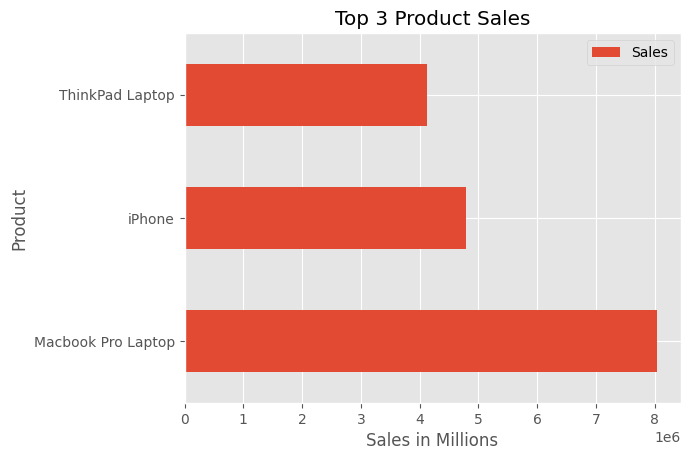

In [173]:
plt.figure(figsize=(5,5))
top3_product_sales.set_index('Product').plot(kind='barh')
plt.title("Top 3 Product Sales")
plt.xlabel("Sales in Millions")
plt.show()

Macbook Pro Laptop Analysis

In [174]:
mac = df_new[df_new['Product'] == 'Macbook Pro Laptop'].groupby('City')[['Quantity Ordered','Sales']].sum().reset_index()

In [175]:
mac = mac.sort_values('Sales', ascending=False).reset_index(drop=True)
mac.index += 1
mac

,City,Quantity Ordered,Sales
1,San Francisco,1136,1931200.0
2,Los Angeles,751,1276700.0
3,New York City,657,1116900.0
4,Boston,479,814300.0
5,Dallas,382,649400.0
6,Atlanta,379,644300.0
7,Seattle,356,605200.0
8,Portland,337,572900.0
9,Austin,251,426700.0


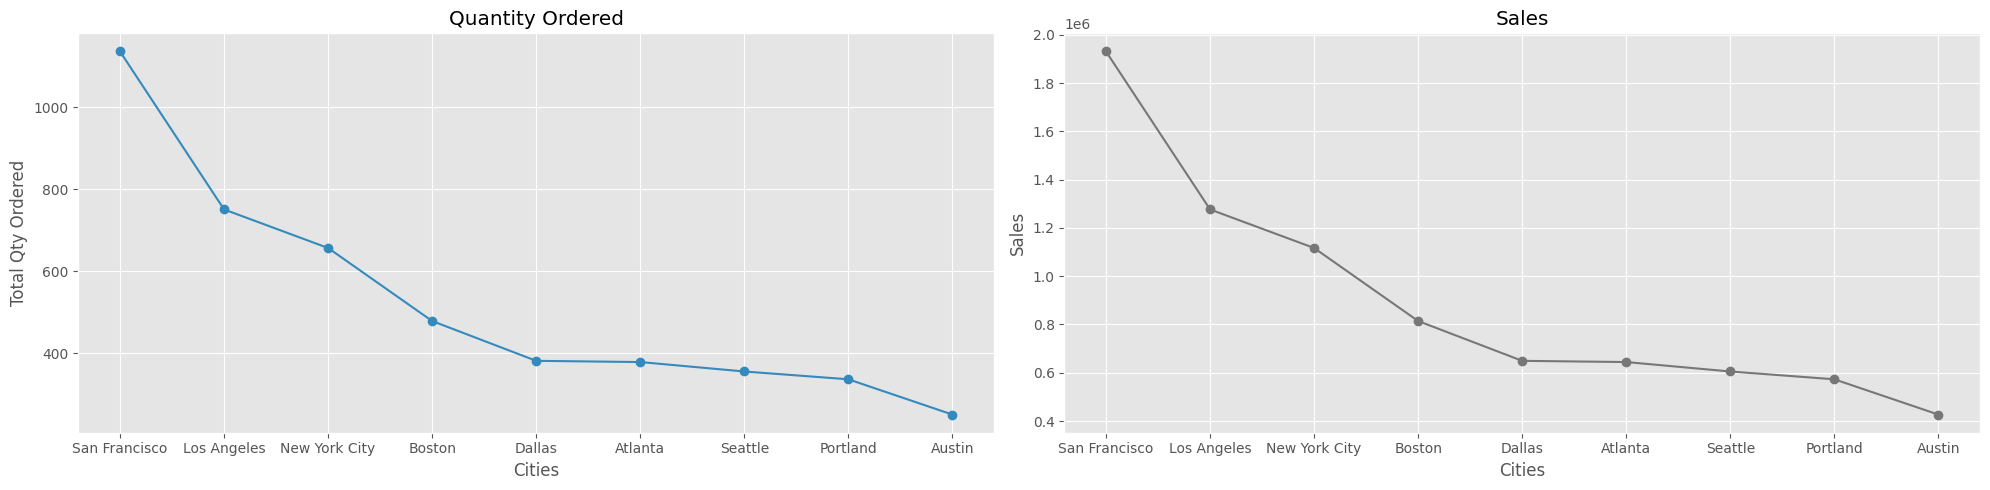

In [176]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# First subplot (Quantity Ordered)
ax1.plot(mac['City'], mac['Quantity Ordered'], marker='o', color=color_pal[1])
ax1.set_xlabel('Cities')
ax1.set_ylabel('Total Qty Ordered')
ax1.set_title('Quantity Ordered')

# Second subplot (Sales)
ax2.plot(mac['City'], mac['Sales'], marker='o', color=color_pal[3])
ax2.set_xlabel('Cities')
ax2.set_ylabel('Sales')
ax2.set_title('Sales')

# Adjust layout for better spacing
plt.tight_layout()

# Show the subplots
plt.show()

In [177]:
mac2 = df_new[df_new['Product'] == 'Macbook Pro Laptop'].groupby('Order Date')['Sales'].sum()
mac2.head(10)

Order Date
2019-01-01    15300.0
2019-01-02    15300.0
2019-01-03     6800.0
2019-01-04    17000.0
2019-01-05     6800.0
2019-01-06     8500.0
2019-01-07    10200.0
2019-01-08    18700.0
2019-01-09    11900.0
2019-01-10     5100.0
Name: Sales, dtype: float64

In [178]:
quarters = {'First Quarter Profit Distribution 2019':('2019-01-01','2019-03-31'),
            'Second Quarter Profit Distribution 2019':('2019-04-01','2019-06-30'),
            'Third Quarter Profit Distribution 2019':('2019-07-01','2019-09-30'),
            'Fourth Quarter Profit Distribution 2019':('2019-10-01','2019-12-31')
            }

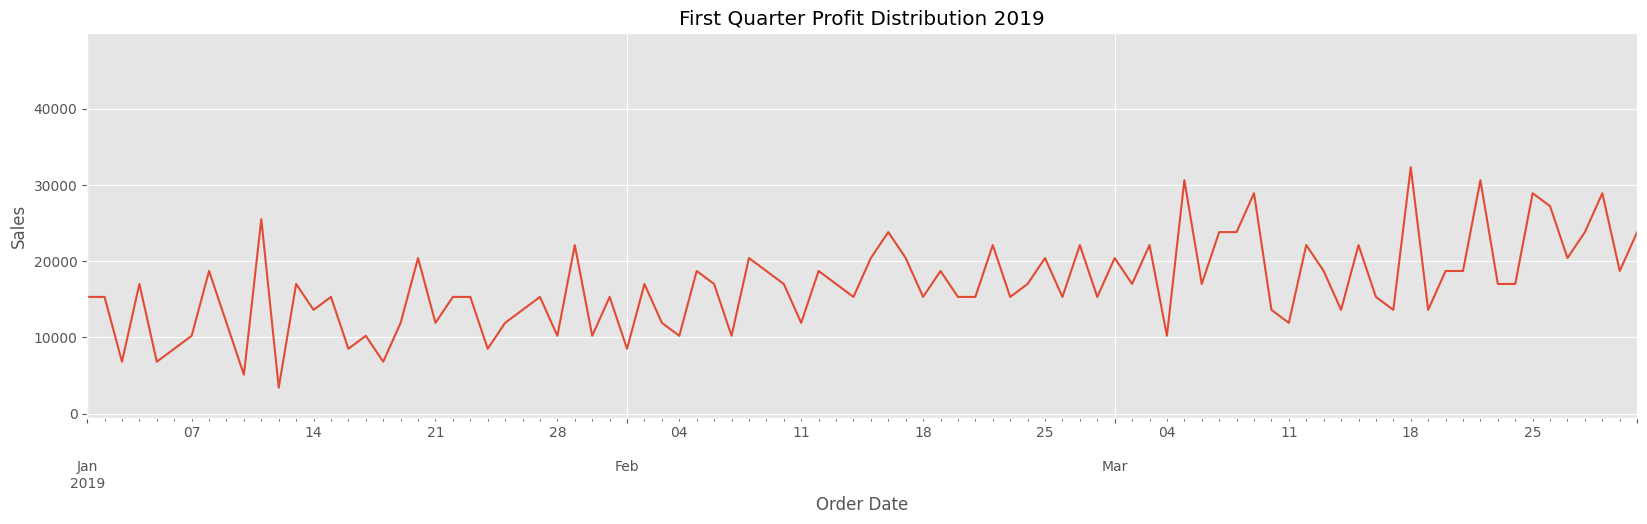

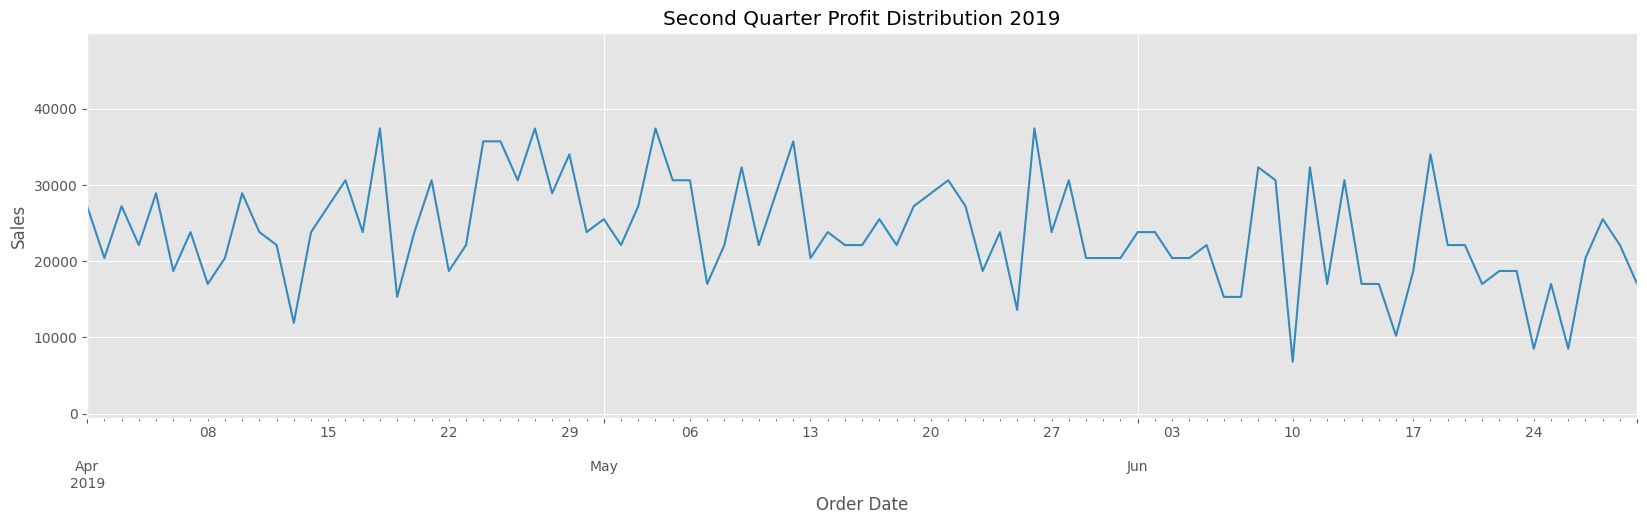

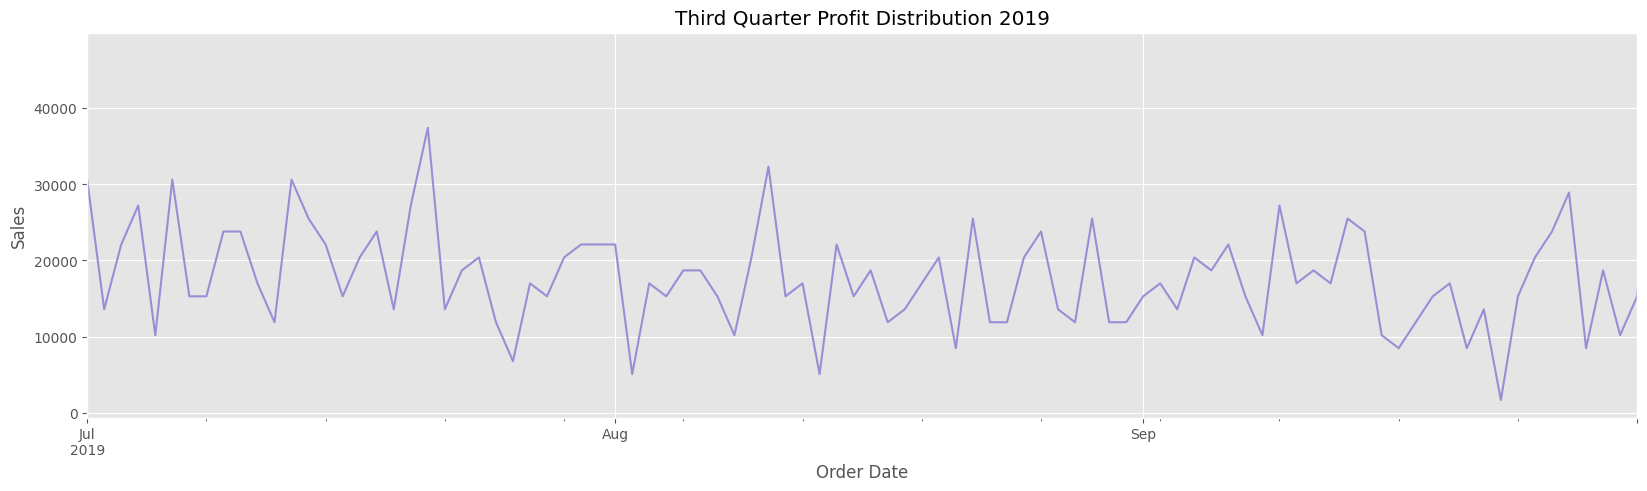

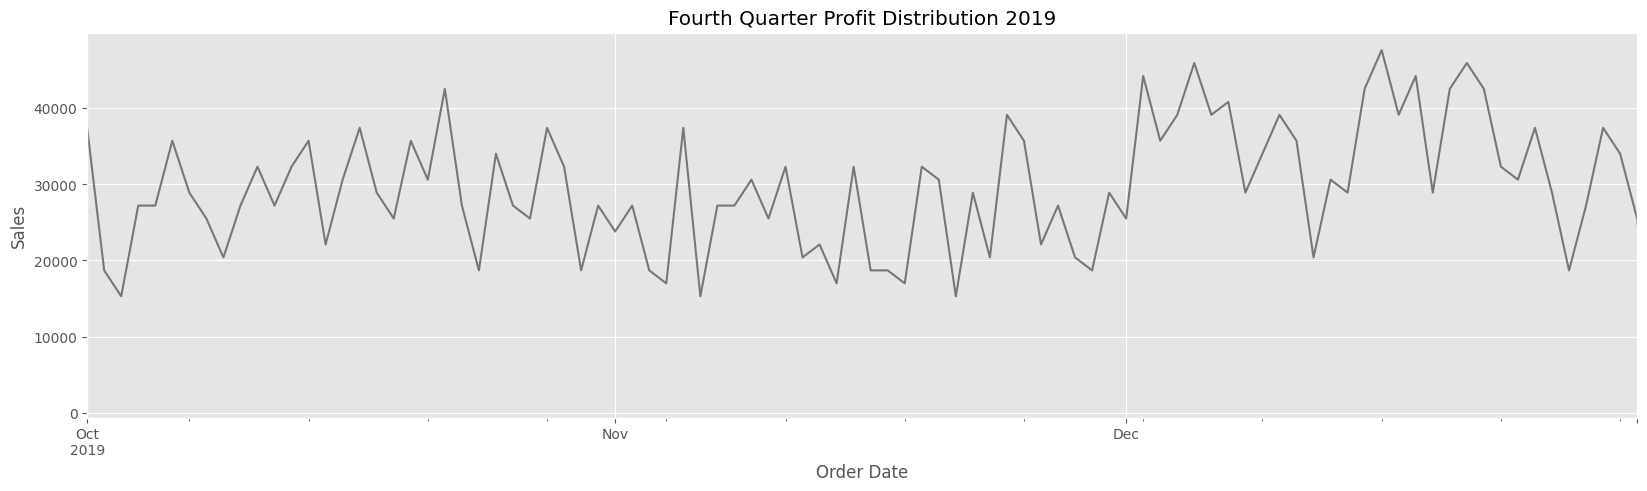

In [184]:
n = 0
for quarter, date in quarters.items():
    start, stop = date
    plt.figure(figsize=(20,5))
    mac2.plot(color=color_pal[n])
    plt.xlim(start, stop)
    plt.title(quarter)
    plt.ylabel('Sales')
    plt.xlabel('Order Date')
    n += 1
    plt.show()

Total Sales Per Quarter

In [180]:
total_sale_per_quarter = {"Quarters":['First Quarter','Second Quarter','Third Quarter','Fourth Quarter'],
                          "Average Sales":[np.ceil(mac2['2019-01-01':'2019-03-31'].sum()),np.ceil(mac2['2019-04-01':'2019-06-30'].sum()),np.ceil(mac2['2019-07-01':'2019-09-30'].sum()),np.ceil(mac2['2019-10-01':'2019-12-31'].sum())]
                         }
                         
total_sale_per_quarter = pd.DataFrame(total_sale_per_quarter)
total_sale_per_quarter

,Quarters,Average Sales
0,First Quarter,1511300.0
1,Second Quarter,2167500.0
2,Third Quarter,1623500.0
3,Fourth Quarter,2733600.0


Average Sales Quarterly

In [181]:
average_sale = {"Quarters":['First Quarter','Second Quarter','Third Quarter','Fourth Quarter'],
                "Average Sales":[np.ceil(mac2['2019-01-01':'2019-03-31'].mean()),np.ceil(mac2['2019-04-01':'2019-06-30'].mean()),np.ceil(mac2['2019-07-01':'2019-09-30'].mean()),np.ceil(mac2['2019-10-01':'2019-12-31'].mean())]
                }

average_sale = pd.DataFrame(average_sale)
average_sale

,Quarters,Average Sales
0,First Quarter,16793.0
1,Second Quarter,23819.0
2,Third Quarter,17647.0
3,Fourth Quarter,29714.0


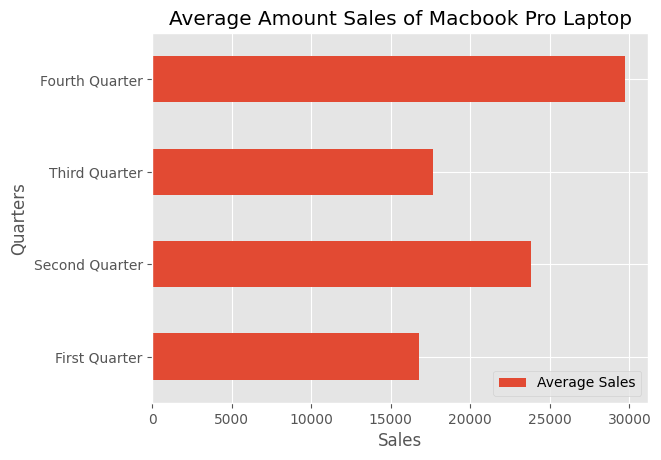

In [182]:
average_sale.set_index('Quarters').plot(kind='barh')
plt.title("Average Amount Sales of Macbook Pro Laptop")
plt.xlabel("Sales")
plt.show()